In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
import graphreadability as gr

In [4]:
Gs = [None] # Start list with None to also use the sedgewick graph
G_names = ["Sedgewick"]
graphs = os.walk('../graphs')
for root, dirs, files in graphs:
    for file in files:
        if file.endswith('.gml'):
            Gs.append(nx.read_gml(os.path.join(root, file)))
        elif file.endswith('.graphml'):
            Gs.append(nx.read_graphml(os.path.join(root, file)))
        G_names.append(file)
Gs

[None,

/home/philip/src/graphreadability/graphreadability/metrics/metrics.py:489: RuntimeWarning: divide by zero encountered in divide
  reduced_h = h / gcd
/home/philip/src/graphreadability/graphreadability/metrics/metrics.py:490: RuntimeWarning: divide by zero encountered in divide
  reduced_w = w / gcd
/tmp/ipykernel_26546/590215495.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(metric_table.index, rotation=90)


Calculated 13 metrics in 0.131 seconds.
--------------------------------------------------
Metric                        Value	Weight
--------------------------------------------------
edge_crossing                 0.667	1
edge_orthogonality            0.321	1
node_orthogonality            0.0  	1
angular_resolution            0.145	1
symmetry                      1.000	1
node_resolution               0.146	1
edge_length                   0.599	1
gabriel_ratio                 0.604	1
crossing_angle                0.151	1
stress                        0.710	1
neighbourhood_preservation    0.125	1
aspect_ratio                  0.962	1
node_uniformity               0.250	1
--------------------------------------------------
Evaluation using weighted_sum: 0.43691
--------------------------------------------------
Calculated 13 metrics in 0.196 seconds.
--------------------------------------------------
Metric                        Value	Weight
----------------------------------------------

/tmp/ipykernel_26546/590215495.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(metric_table.index, rotation=90)


Calculated 13 metrics in 0.220 seconds.
--------------------------------------------------
Metric                        Value	Weight
--------------------------------------------------
edge_crossing                 0.905	1
edge_orthogonality            0.554	1
node_orthogonality            0.000	1
angular_resolution            0.586	1
symmetry                      0.0  	1
node_resolution               0.274	1
edge_length                   0.891	1
gabriel_ratio                 0.972	1
crossing_angle                0.830	1
stress                        0.175	1
neighbourhood_preservation    0.500	1
aspect_ratio                  1.000	1
node_uniformity               0.500	1
--------------------------------------------------
Evaluation using weighted_sum: 0.55285
--------------------------------------------------


/tmp/ipykernel_26546/590215495.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(metric_table.index, rotation=90)


Calculated 13 metrics in 0.881 seconds.
--------------------------------------------------
Metric                        Value	Weight
--------------------------------------------------
edge_crossing                 0.913	1
edge_orthogonality            0.439	1
node_orthogonality            0.000	1
angular_resolution            0.313	1
symmetry                      0.0  	1
node_resolution               0.055	1
edge_length                   0.711	1
gabriel_ratio                 0.608	1
crossing_angle                0.510	1
stress                        0.553	1
neighbourhood_preservation    0.288	1
aspect_ratio                  0.715	1
node_uniformity               0.667	1
--------------------------------------------------
Evaluation using weighted_sum: 0.44397
--------------------------------------------------


/tmp/ipykernel_26546/590215495.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(metric_table.index, rotation=90)


Calculated 13 metrics in 0.231 seconds.
--------------------------------------------------
Metric                        Value	Weight
--------------------------------------------------
edge_crossing                 0.786	1
edge_orthogonality            0.525	1
node_orthogonality            0.000	1
angular_resolution            0.254	1
symmetry                      0.0  	1
node_resolution               0.210	1
edge_length                   0.733	1
gabriel_ratio                 0.712	1
crossing_angle                0.070	1
stress                        0.484	1
neighbourhood_preservation    0.231	1
aspect_ratio                  0.931	1
node_uniformity               0.750	1
--------------------------------------------------
Evaluation using weighted_sum: 0.43727
--------------------------------------------------


/tmp/ipykernel_26546/590215495.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(metric_table.index, rotation=90)


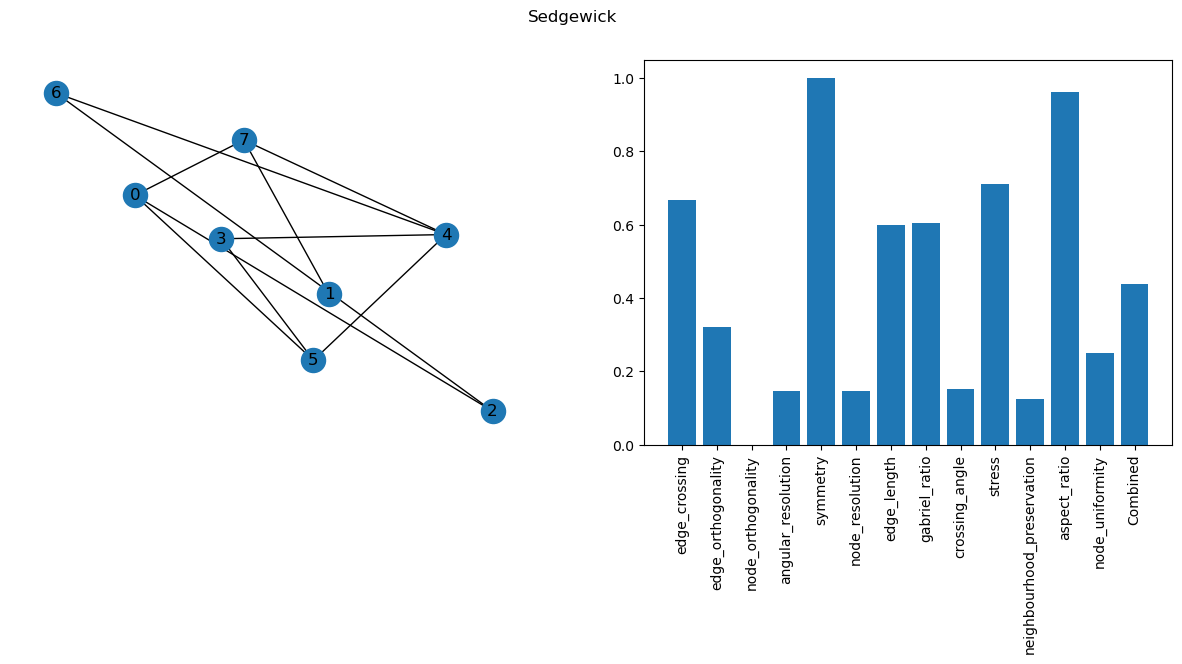

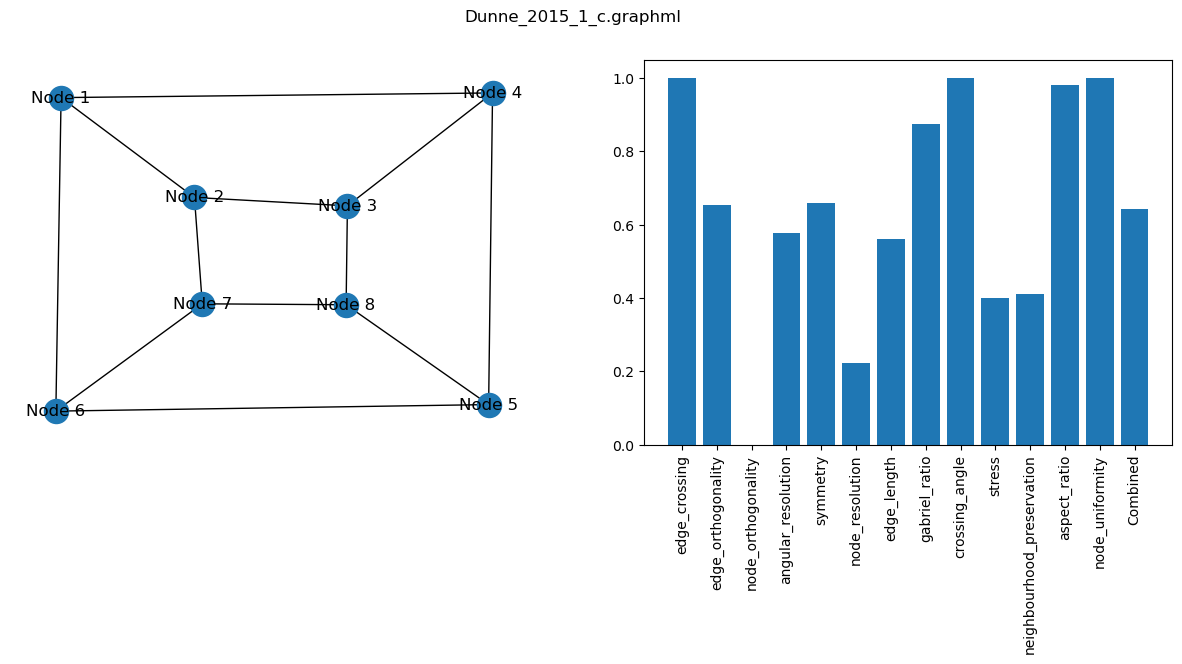

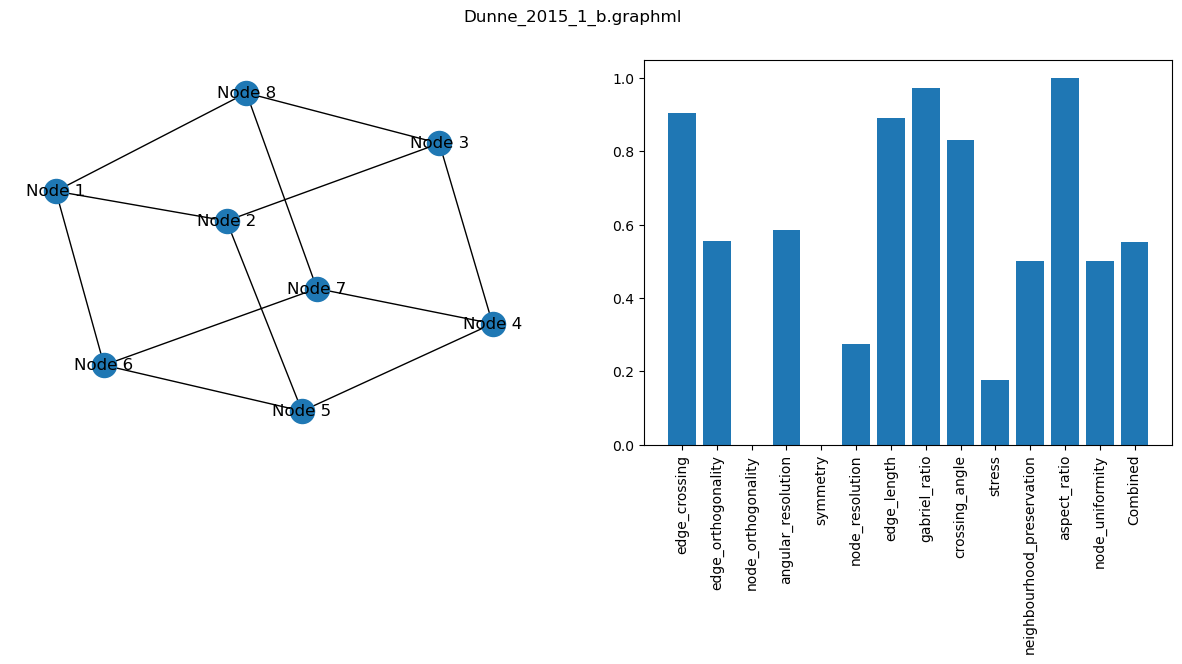

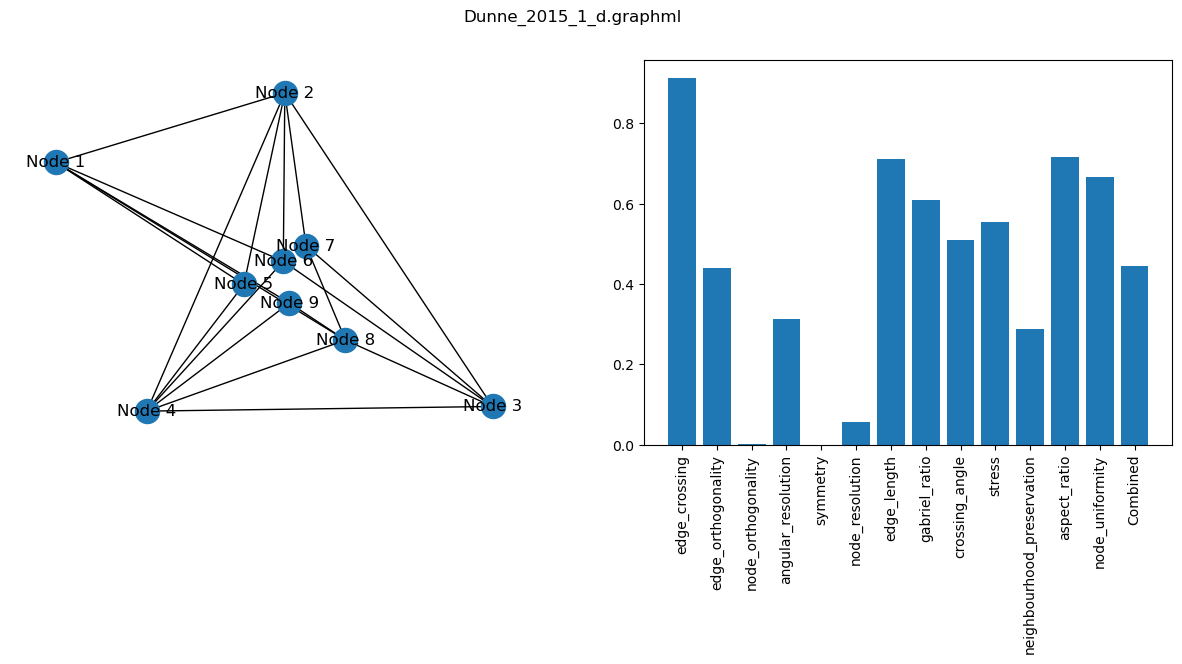

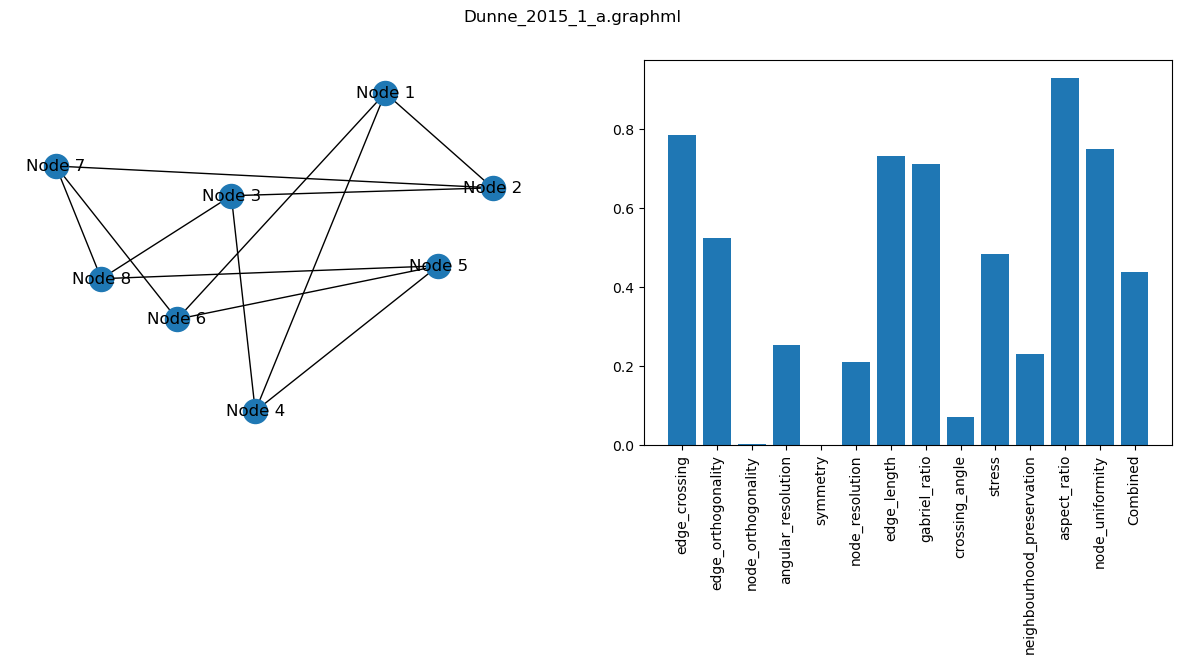

In [18]:
# For each graph, plot and print the readability metrics
metric_tables = []
for G in Gs:
    M = gr.MetricsSuite(G)
    M.calculate_metrics()

    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    plt.suptitle(G_names[Gs.index(G)])
    
    # Plot the readability metrics as a table in the second subplot
    metric_table = pd.Series(M.metric_table())
    ax[1].bar(metric_table.index, metric_table.values)
    metric_tables.append(metric_table)
    ax[1].set_xticklabels(metric_table.index, rotation=90)

    gr.draw_graph(M._graph, ax=ax[0])

    M.pretty_print_metrics()

In [19]:
tables = pd.DataFrame.from_records(metric_tables, index=G_names, columns=metric_table.index).sort_values(by="Combined", ascending=False)
tables

,edge_crossing,edge_orthogonality,node_orthogonality,angular_resolution,symmetry,node_resolution,edge_length,gabriel_ratio,crossing_angle,stress,neighbourhood_preservation,aspect_ratio,node_uniformity,Combined
Dunne_2015_1_c.graphml,1.000000,0.654402,0.000070,0.577024,0.658042,0.222082,0.559203,0.875000,1.000000,0.399290,0.411765,0.979472,1.000000,0.641258
Dunne_2015_1_b.graphml,0.904762,0.553719,0.000064,0.586345,0.000000,0.273707,0.890717,0.972222,0.830233,0.175278,0.500000,1.000000,0.500000,0.552850
Dunne_2015_1_d.graphml,0.913043,0.439352,0.000150,0.312553,0.000000,0.054880,0.710631,0.608247,0.509530,0.553196,0.288136,0.715278,0.666667,0.443974
Dunne_2015_1_a.graphml,0.785714,0.525225,0.000071,0.253618,0.000000,0.209607,0.732881,0.711864,0.069990,0.484107,0.230769,0.930636,0.750000,0.437268
Sedgewick,0.666667,0.321167,0.000000,0.145397,1.000000,0.145645,0.599264,0.603774,0.150854,0.710168,0.125000,0.961850,0.250000,0.436907


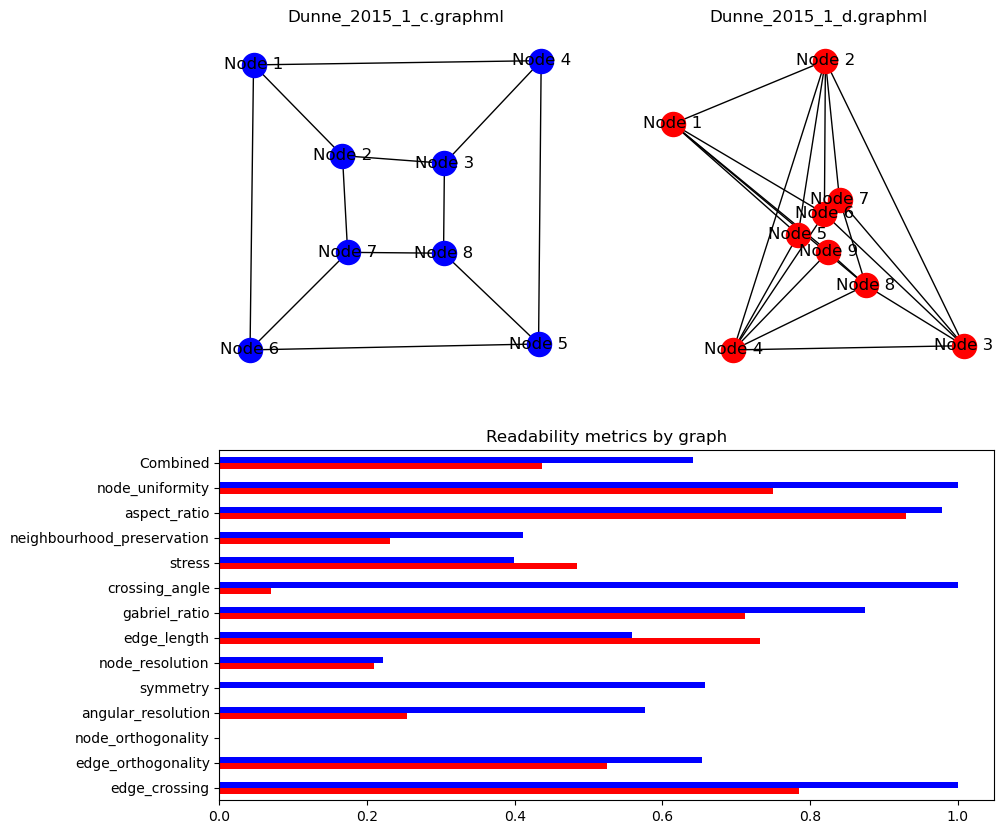

In [20]:
# Plot the readability metrics as a horizontal barplot grouped by column name and colored by index
fig, axs = plt.subplots(2,2, figsize=(10, 10))
gs = axs[1,1].get_gridspec()
for ax in axs[1,:]:
    ax.remove()
ax_bottom = fig.add_subplot(gs[1,:])
tables.iloc[[3,0]].T.plot(ax=ax_bottom, kind='barh', stacked=False, color = ['r', 'b'], legend=False)

ax_bottom.set_title("Readability metrics by graph")
gr.draw_graph(Gs[1], ax=axs[0][0], node_color='b')
axs[0, 0].set_title(G_names[1])
gr.draw_graph(Gs[3], ax=axs[0][1], node_color='r')
axs[0, 1].set_title(G_names[3])
plt.show()